In [832]:
import numpy as np
import pandas as pd
import math
# import netCDF4 as nc
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import pyart

import astropy.coordinates as coord
from astropy.time import Time
import astropy.units as u

# from pysolar.solar import get_altitude, get_azimuth, constants
# from pysolar.solar import get_azimuth, get_sun_earth_distance, get_projected_radial_distance
# from pysolar import solartime as stime
# import pytz

import cartopy.crs as ccrs

import time
import datetime

#  32.5,  33.5
# -97.5, -96.5

/Users/Strawberry/opt/miniconda3/envs/geo_env/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [989]:
folder = "spatial"
node_id = "10004098"
dir_NEXRAD = '/Volumes/Backup Plus/NEXRAD/data/'
dir_data = "../data/"
dir_out = "../figures/" + folder + "/"

fn_in = dir_data + "driving_" + node_id + ".csv"
df = pd.read_csv(fn_in, parse_dates=True, index_col = 'UTC')
df.head()

/Users/Strawberry/opt/miniconda3/envs/geo_env/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Illuminance,360nm,361nm,362nm,363nm,364nm,365nm,366nm,367nm,368nm,...,777nm,778nm,779nm,780nm,latitude,longitude,altitude,Zenith,Azimuth,Sun Distance
UTC,,,,,,,,,,,,,,,,,,,,,
2020-01-08 16:43:50,2345.220551,0.032529,0.032651,0.033183,0.033997,0.034946,0.035627,0.036239,0.036761,0.037158,...,0.029645,0.029761,0.029830,0.029849,32.992279,-96.756782,226.74,61.131565,150.852597,1.470931e+11
2020-01-08 16:44:00,2385.540894,0.033112,0.033226,0.033758,0.034580,0.035541,0.036231,0.036851,0.037380,0.037782,...,0.036332,0.036510,0.036637,0.036706,32.991883,-96.756719,232.32,61.114173,150.892058,1.470931e+11
2020-01-08 16:46:40,3521.045288,0.036604,0.036802,0.037441,0.038386,0.039475,0.040252,0.040949,0.041550,0.042018,...,0.049129,0.049250,0.049294,0.049267,32.992381,-96.756637,225.08,60.845127,151.526867,1.470930e+11
2020-01-08 16:46:50,4220.051209,0.044110,0.044308,0.045068,0.046215,0.047553,0.048541,0.049440,0.050220,0.050827,...,0.048394,0.048633,0.048803,0.048892,32.992810,-96.756288,223.16,60.828704,151.567132,1.470930e+11
2020-01-08 16:47:00,4105.486389,0.043972,0.044196,0.044981,0.046150,0.047503,0.048477,0.049356,0.050115,0.050708,...,0.047814,0.048059,0.048236,0.048330,32.994113,-96.756270,218.74,60.813205,151.607331,1.470930e+11


In [970]:
dates = sorted(set(df.index.date))
date = dates[0]
df_date = df[df.index.date == date]

/Users/Strawberry/opt/miniconda3/envs/geo_env/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1004]:
datetime.timedelta(days = 1)

/Users/Strawberry/opt/miniconda3/envs/geo_env/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


datetime.timedelta(days=1)

/Users/Strawberry/opt/miniconda3/envs/geo_env/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


datetime.date(2020, 4, 19)

In [1044]:
def get_filenames_by_date(date):
    date_str = str(date)
    dir_date = dir_NEXRAD + date_str + '/'
    return sorted([dir_date + fn for fn in os.listdir(dir_date) if (fn[0]!='.') & (fn[-1]!='M')])

/Users/Strawberry/opt/miniconda3/envs/geo_env/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1052]:
variables = ['cross_correlation_ratio',
             'differential_phase',
             'differential_reflectivity',
             'reflectivity',
             'spectrum_width',
             'velocity' ]
altitude_radar = 236.0

dates = sorted(set(df.index.date))
for date in dates:
    print(date)
    df_date = df[df.index.date == date]
    
    date_str = str(date)
    dir_date = dir_NEXRAD + date_str + '/'
    
    # initialize fn_prev to the last file name of yesterday's folder
    fn_prev = get_filenames_by_date(date - datetime.timedelta(days = 1))[-1]
    time_prev = datetime.datetime.strptime(fn_prev[-19:-4], '%Y%m%d_%H%M%S')
    
    fns = get_filenames_by_date(date)
    # merge NEXRAD data into df_date
    i = 0
    while i < len(fns):
        fn_curr = fns[i]
        time_curr = datetime.datetime.strptime(fn_curr[-19:-4], '%Y%m%d_%H%M%S')
        df_i = df_date[(df_date.index >= time_prev) & (df_date.index <= time_curr)]
        if len(df_i) > 0:
            # read NEXRAD data of time_prev and time_curr
            radar_prev = pyart.io.read(fn_prev)
            radar_curr = pyart.io.read(fn_curr)
            
            # merge NEXRAD data between time_prev and time_curr
            for time in df_i.index:
                longitude = df_i[time]['longitude']
                latitude = df_i[time]['latitude']
                altitude = df_i[time]['altitude']
                
                
                x_curr, y_curr = pyart.core.geographic_to_cartesian(radar.longitude['data'][0],
                                                                    radar.latitude['data'][0],
                                                                    grid.get_projparams())
                z_curr = 10000*0, 10000*0, 1320*0
                delta_x, delta_y, delta_z = 5000, 5000, 1000

                grid = pyart.map.grid_from_radars(radar, grid_shape=(11, 3, 3),\
                                                  grid_limits=((z_curr,z_curr+10*delta_z), (x_curr - delta_x, x_curr + delta_x), (y_curr - delta_y, y_curr + delta_y)))

                
                
            break                          
        fn_prev = fn_curr
        time_prev = time_curr
        i += 1
        
    
    break
    

/Users/Strawberry/opt/miniconda3/envs/geo_env/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2020-01-08


In [1059]:
radar.get

/Users/Strawberry/opt/miniconda3/envs/geo_env/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<module 'time' (built-in)>

In [ ]:
# dbz = 10 log_10^(Z/Z_0)
# we should do Interpolation on Z/Z_0


In [837]:
filename = '/Volumes/Backup Plus/NEXRAD/data/2020-02-10/2020_02_10_KFWS_KFWS20200210_140005_V06'
radar = pyart.io.read(filename)
altitude_radar = 236.0

/Users/Strawberry/opt/miniconda3/envs/geo_env/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [932]:
radar.time

/Users/Strawberry/opt/miniconda3/envs/geo_env/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'units': 'seconds since 2020-02-10T14:00:05Z',
 'standard_name': 'time',
 'long_name': 'time_in_seconds_since_volume_start',
 'calendar': 'gregorian',
 'comment': 'Coordinate variable for time. Time at the center of each ray, in fractional seconds since the global variable time_coverage_start',
 'data': array([  0.363,   0.407,   0.453, ..., 254.133, 254.182, 254.232])}

In [909]:
grid.fields['reflectivity']['data'].max()

/Users/Strawberry/opt/miniconda3/envs/geo_env/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


13.396385

In [1057]:
x_curr, y_curr, z_curr = 10000*0, 10000*0, 1320*0
delta_x, delta_y, delta_z = 5000, 5000, 1000

grid = pyart.map.grid_from_radars(radar, grid_shape=(11, 3, 3),\
                                  grid_limits=((z_curr,z_curr+10*delta_z), (x_curr - delta_x, x_curr + delta_x), (y_curr - delta_y, y_curr + delta_y)))


/Users/Strawberry/opt/miniconda3/envs/geo_env/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/Strawberry/opt/miniconda3/envs/geo_env/lib/python3.9/site-packages/pyart/map/gates_to_grid.py:163: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990.
  warnings.warn("Barnes weighting function is deprecated."


In [857]:
def log10_mean(dbz1, dbz2, w1=0.5, w2=0.5):
    return 10*np.log10(w1*10**(dbz1/10) + w2*10**(dbz2/10))

/Users/Strawberry/opt/miniconda3/envs/geo_env/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1061]:
pyart.core.geographic_to_cartesian(radar.longitude['data'][0],
                                   radar.latitude['data'][0],
                                   grid.get_projparams())

/Users/Strawberry/opt/miniconda3/envs/geo_env/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(array([0.]), array([0.]))

/Users/Strawberry/opt/miniconda3/envs/geo_env/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


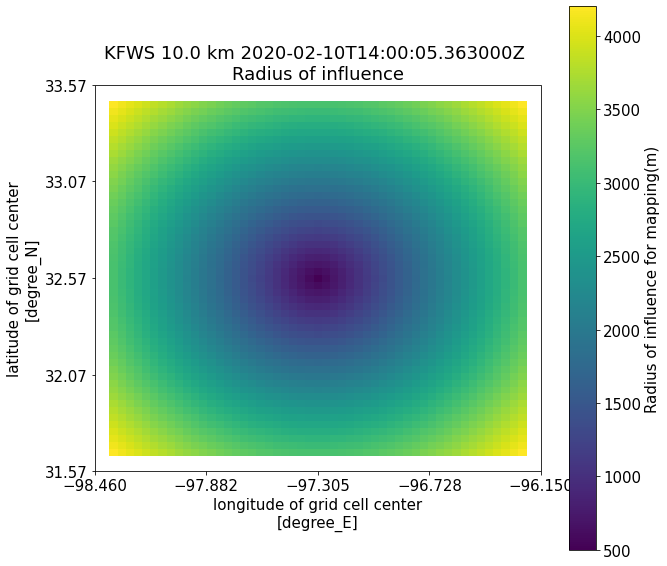

In [926]:
plt.rcParams.update({'font.size': 15})
fig = plt.figure(figsize=[10, 10])
display = pyart.graph.GridMapDisplay(grid)
display.plot_grid('ROI', level=1)